In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
titanic= sns.load_dataset('titanic')
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 1) Cinsiyetleregore yolcu sayisini gormek icin hangi tur grafigi secersiniz?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

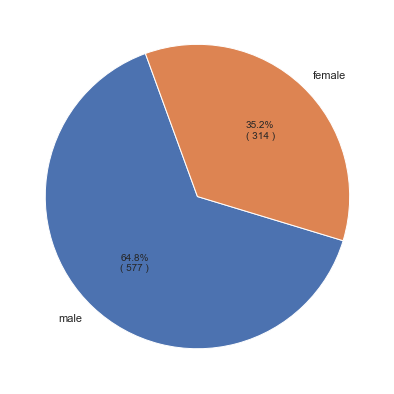

In [3]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n( {:d} )".format(pct, absolute)

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x=df.sex.value_counts(), 
       labels=df.sex.unique(), 
       autopct=lambda pct: func(pct, df.sex.value_counts()),
       startangle=110)
plt.show()

#### 2) Binis limanina gore yolcu yuzdelerini gormek icin hangi grafik turlerini secersiniz?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

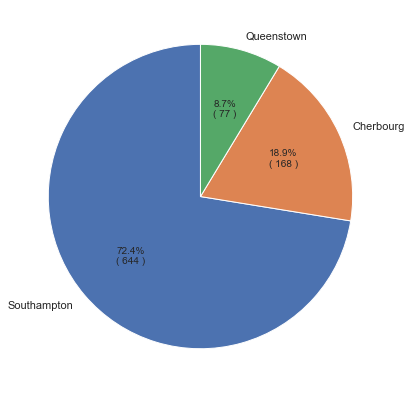

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x=df.embark_town.value_counts().dropna(), 
       labels=df.embark_town.dropna().unique(), 
       autopct=lambda pct: func(pct, df.embark_town.value_counts().dropna()),
       startangle=90)
plt.show()

#### 3) Yas-cinsiyet grafiginde yas icin outlier lari gormek isterseniz hangi grafik turunu secersiniz?

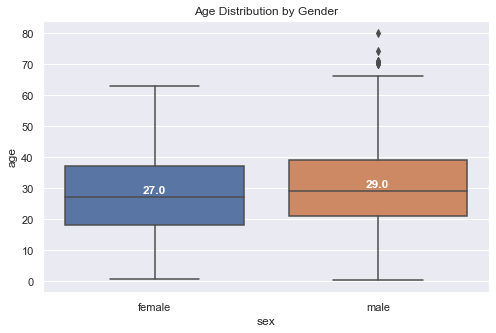

In [5]:
def box_labels(ax, df,col1,col2):
    medians = df.groupby([col1])[col2].median()
    vertical_offset = df[col2].median()*0.05 # offset from median for display
    for xtick in ax.get_xticks():
        ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                horizontalalignment='center',size='large',color='w',weight='semibold')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.boxplot(x='sex', y='age', data=df.sort_values('sex'))
box_labels(ax, df.sort_values('sex'),'sex','age')    
plt.title('Age Distribution by Gender')
plt.show()

#### 4) Grafik 1 de degisiklikler yaparak sizde farkli pie chart lar deneyiniz.
(erkek cocuk-kiz cocuk yolcularin grafigi,vb.)

In [6]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


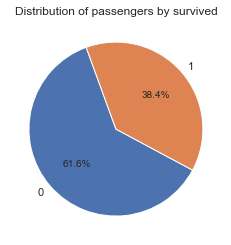

In [7]:
plt.pie(df.survived.value_counts(), labels = df.survived.unique(), autopct = '%1.01f%%',startangle=110)
plt.title('Distribution of passengers by survived')
# plt.legend(['Not Survived', 'Survived'])
plt.show()

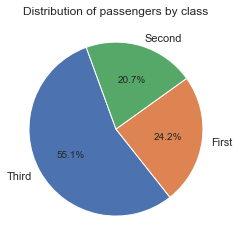

In [8]:
plt.pie(df['class'].value_counts(), labels = df['class'].unique(), autopct = '%1.01f%%',startangle=110)
plt.title('Distribution of passengers by class')
plt.show()

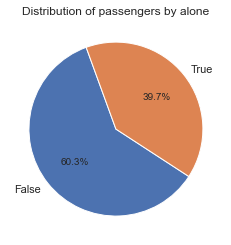

In [9]:
plt.pie(df['alone'].value_counts(), labels = df['alone'].unique(), autopct = '%1.01f%%',startangle=110)
plt.title('Distribution of passengers by alone')
plt.show()

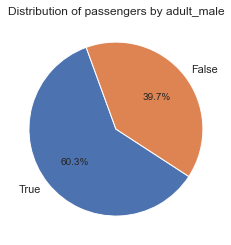

In [10]:
plt.pie(df['adult_male'].value_counts(), labels = df['adult_male'].unique(), autopct = '%1.01f%%',startangle=110)
plt.title('Distribution of passengers by adult_male')
plt.show()

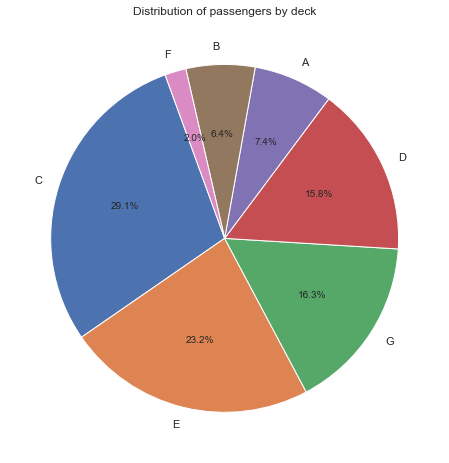

In [11]:
plt.figure(figsize=(8,8))
plt.pie(df['deck'].dropna().value_counts(), labels = df['deck'].dropna().unique(), autopct = '%1.01f%%',startangle=110)
plt.title('Distribution of passengers by deck')
plt.show()

# Although we drew this graph, if number of unique items is bigger than 5, pie chart is not preferred.

#### 5) Grafik 2 nin kodlarindan yararlanarak pie chart ile gosterdiginiz grafikleri bar charta donusturunuz.

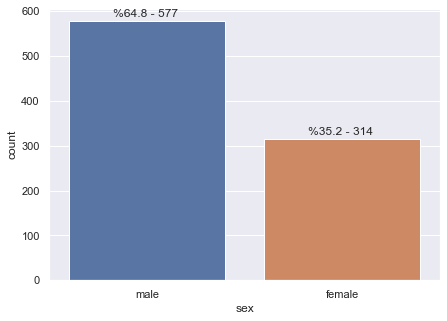

In [12]:
def labels(ax):
    for bar in ax.patches: 
        ax.annotate('%{:.1f} - {:.0f} '.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=12, xytext=(0, 8), 
                    textcoords='offset points') 
        
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='sex',data=df)
labels(ax)

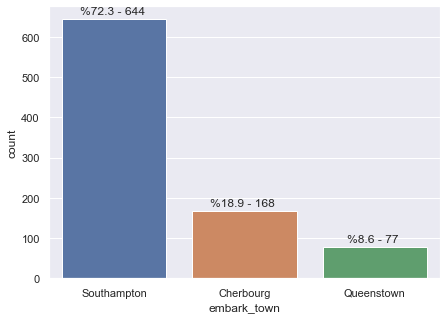

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='embark_town',data=df)
labels(ax)

#### 6) Grafik 3,4 hangi grafik turune ornektir? Baska hangi titanic datasi degiskenleri icin bu grafik turunu kullanabiliriz,yorum yapiniz.

They are stacked bar chart. We can also use it for `embark_town-survived frequency`, `deck-survived frequency` and `alone-survived frequency`

#### 7) Grafik 5 hangi grafik turune ornektir?

It is a box plot

#### 8) Grafik 6 ya gore ucret ile hayatta kalma arasindaki korelasyon kactir?

In [15]:
np.corrcoef(df.fare,df.survived)[0][1]

<IPython.core.display.Javascript object>

0.25730652238496227